Content - Geography - USA, Srilanka and Pakistan.
Time period = jan -dec 2016.Like total drives, total miles, start date, end date , start location ,end location, purpose of drive

In [ ]:
# Analysis and mathematical libraries
import numpy as np

import pandas as pd

# visualization libraries
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Datetime

import time, datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('My uber Drives - 2016.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
df.columns = df.columns.str.replace("*","")

In [ ]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
df.shape

(1156, 7)

In [ ]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
## Handling missing values
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

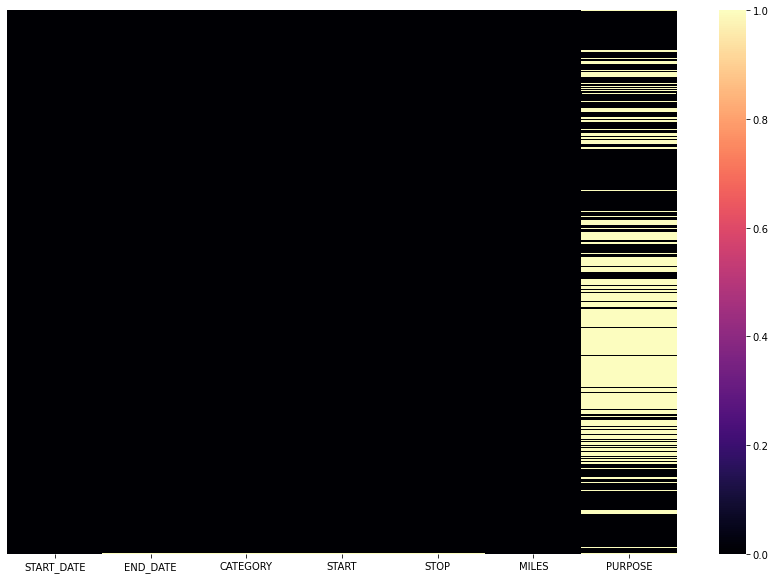

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.isnull(),yticklabels = False,cmap = 'magma')
plt.show()

In [ ]:
df1 = df.copy()
df1.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [ ]:
df1.dropna(axis=0, how = 'all',subset=["END_DATE","CATEGORY","START","STOP"],inplace=True)

In [ ]:
df1.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

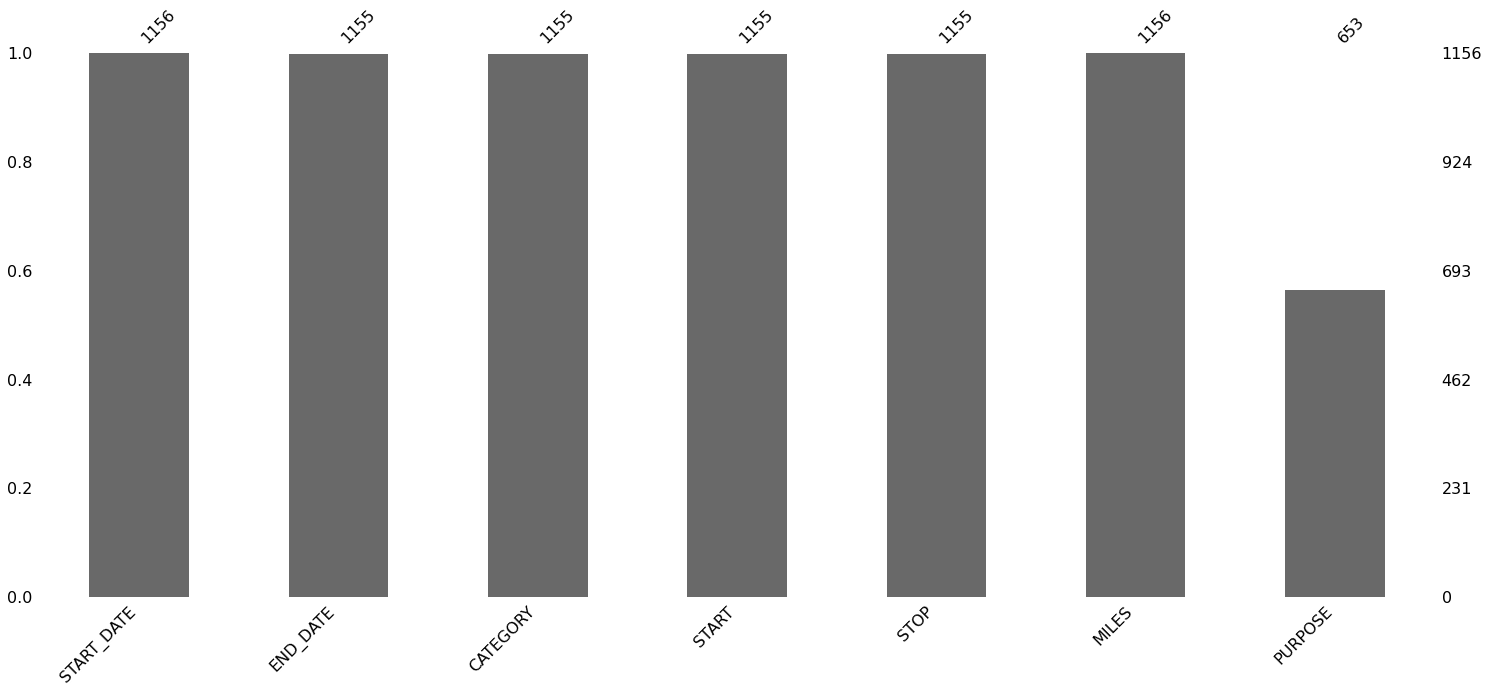

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
df.drop(index = 1155, axis=0,inplace=True)

In [ ]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [ ]:
df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

In [ ]:
(df['PURPOSE'].isnull().sum()/len(df))*100

43.46320346320346

In [ ]:
df['PURPOSE'].fillna(method = 'ffill',inplace = True)

In [ ]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors = 'coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


<AxesSubplot:>

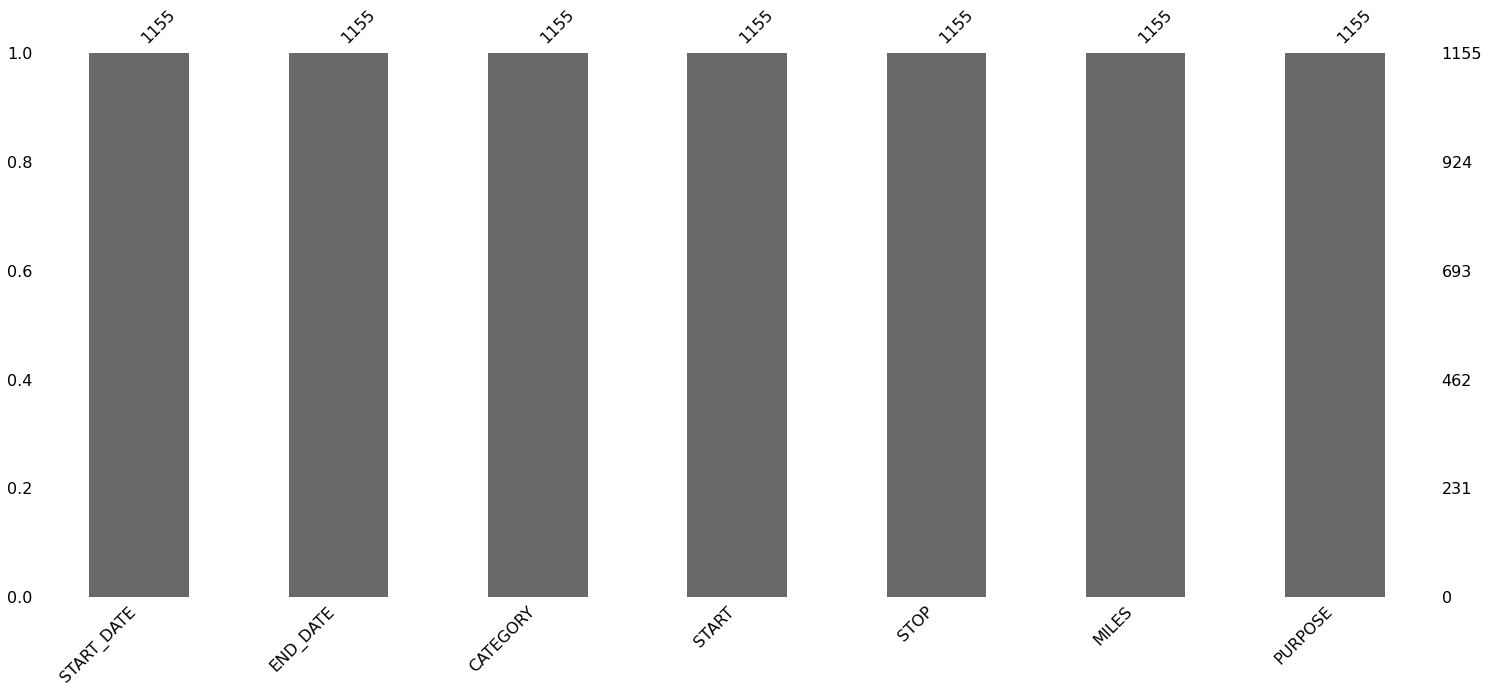

In [ ]:
msno.bar(df)

In [ ]:
df.shape

(1155, 7)

In [ ]:
category = pd.crosstab(index = df['CATEGORY'],columns = 'count of travel as per category')

In [ ]:
category

col_0,count of travel as per category
CATEGORY,
Business,1078
Personal,77


In [ ]:
df['CATEGORY'].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

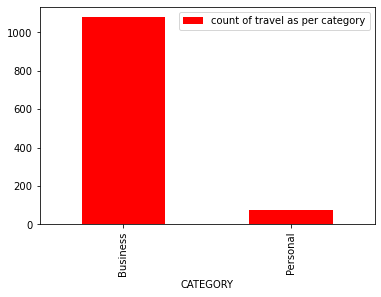

In [ ]:
category.plot(kind='bar',color='r')
plt.legend()

In [ ]:
start_point = df.START.value_counts()

In [ ]:
start_point

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Arlington             1
Gampaha               1
Jamestown Court       1
Seattle               1
Sunnyside             1
Name: START, Length: 177, dtype: int64

In [ ]:
start_point[df.START.value_counts()>10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
R?walpindi           11
Kissimmee            11
Kenner               11
Name: START, dtype: int64

In [ ]:
start_point[start_point<2]

Lower Garden District    1
Sunnyvale                1
Red River District       1
Tenderloin               1
Almond                   1
                        ..
Arlington                1
Gampaha                  1
Jamestown Court          1
Seattle                  1
Sunnyside                1
Name: START, Length: 87, dtype: int64

<AxesSubplot:ylabel='START'>

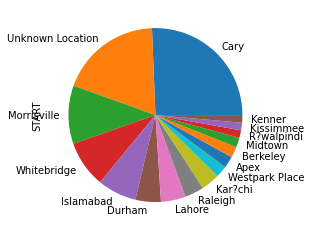

In [ ]:
start_point[start_point>10].plot(kind='pie')

In [ ]:
stop_point = df.STOP.value_counts()

In [ ]:
stop_point

Cary                       203
Unknown Location           149
Morrisville                 84
Whitebridge                 65
Islamabad                   58
                          ... 
Gramercy-Flatiron            1
Midtown West                 1
Depot Historic District      1
Palm Beach                   1
Kips Bay                     1
Name: STOP, Length: 188, dtype: int64

In [ ]:
stop_point[stop_point>10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64

In [ ]:
miles = df.MILES.value_counts()
miles

9.9      28
3.1      26
2.1      19
10.4     19
2.5      19
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES, Length: 256, dtype: int64

In [ ]:
miles[miles>10]

9.9     28
3.1     26
2.1     19
10.4    19
2.5     19
3.0     19
1.8     18
2.2     18
1.7     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
1.4     14
5.5     14
1.6     13
7.9     13
1.5     12
2.7     12
6.2     12
5.7     12
2.9     12
2.3     12
6.0     11
7.7     11
1.0     11
4.9     11
5.1     11
Name: MILES, dtype: int64

<AxesSubplot:>

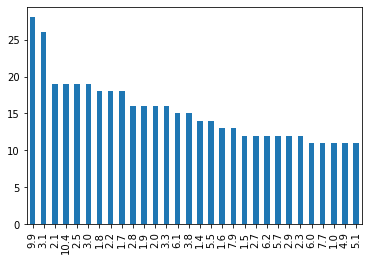

In [ ]:
miles[miles>10].plot(kind ='bar')

In [ ]:
miles[miles<10]

2.4      9
1.2      9
2.6      9
3.2      9
4.1      9
        ..
310.3    1
11.1     1
10.7     1
195.6    1
22.7     1
Name: MILES, Length: 221, dtype: int64

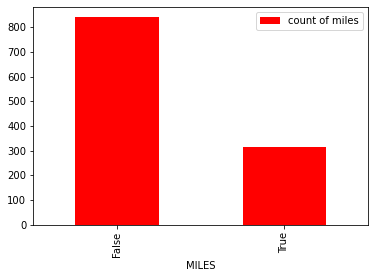

In [ ]:
miles = pd.crosstab(index = df['MILES']>10,columns = 'count of miles')
miles.plot(kind = 'bar',color = 'r')
plt.legend()

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.PURPOSE.value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

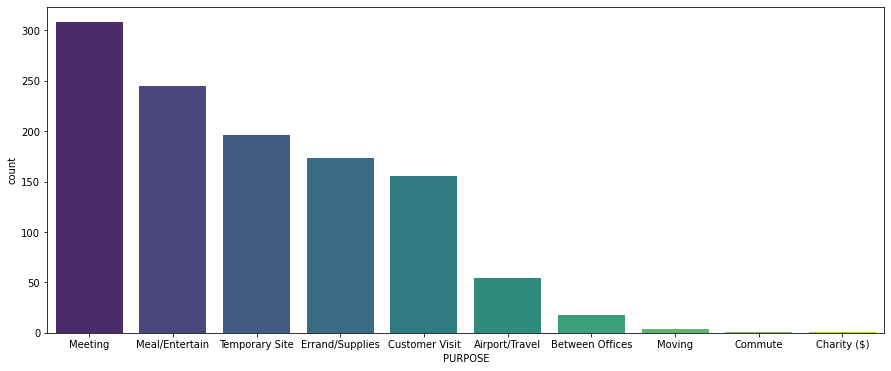

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'],order = df['PURPOSE'].value_counts().index, palette = 'viridis')

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
## Lets calculate the duration,as there might be some relation of it with purpose of ride.
df['minute'] = df.END_DATE - df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minute
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [ ]:
df['minute'] = df['minute'].dt.total_seconds()/60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minute
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [ ]:
## Grouping purpose by miles to see if we can get any pattern

pd.DataFrame({'Mean': df.groupby(['PURPOSE'])['MILES'].mean().round(1),
            'MIN': df.groupby(["PURPOSE"])['MILES'].min(),
            'MAX': df.groupby(["PURPOSE"])['MILES'].max()}).reset_index()

,PURPOSE,Mean,MIN,MAX
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

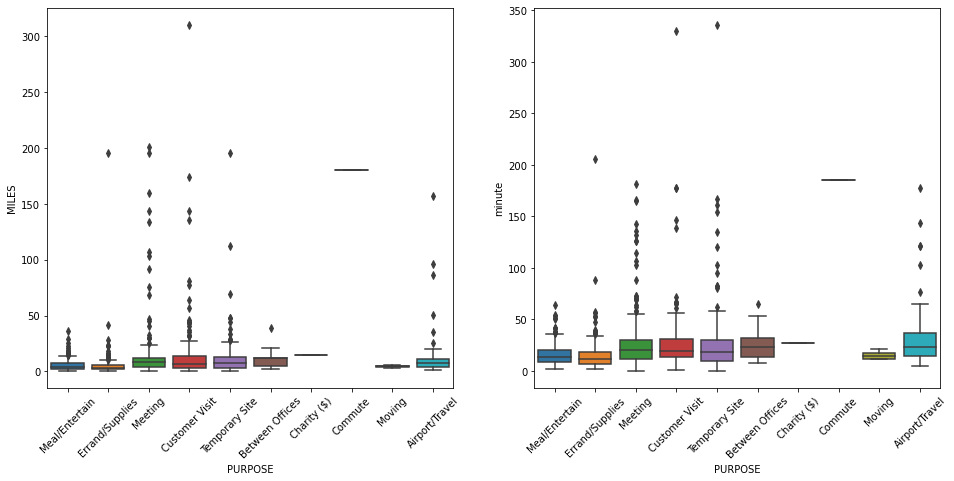

In [ ]:
## BOX plot of miles and minutes

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x= df.PURPOSE,y = df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minute)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

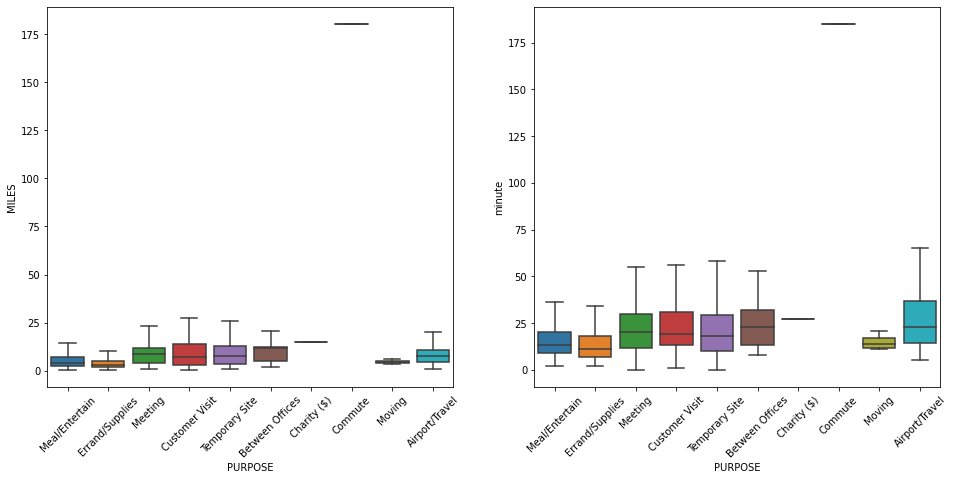

In [ ]:
## BOX plot of miles and minutes

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x= df.PURPOSE,y = df.MILES,showfliers  =False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minute,showfliers= False)
plt.xticks(rotation=45)

In [ ]:
## write a function that will take df as input and in that df check if start  == store return yes otherwise return no

In [ ]:
def round(x):
    if x['START'] == x['STOP']:
        return 'yes'
    else:
        return 'no'
    
    
df['ROUND_TRIP'] = df.apply(round,axis=1)

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minute,ROUND_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no


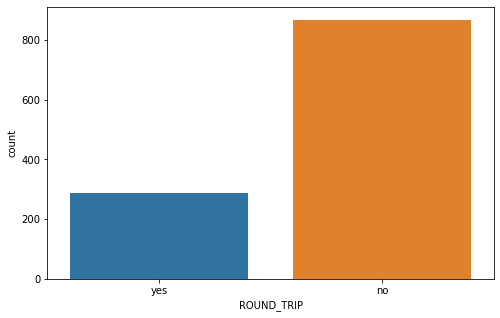

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(df['ROUND_TRIP'])
plt.show()

In [ ]:
##Entering Month name and evaluating frequency of trip in each month
df['month'] = pd.DatetimeIndex(df['START_DATE']).month

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minute,ROUND_TRIP,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,1


In [ ]:
dic = {1 :'jan',2: 'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'}
df['month'] = df['month'].map(dic)

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minute,ROUND_TRIP,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan


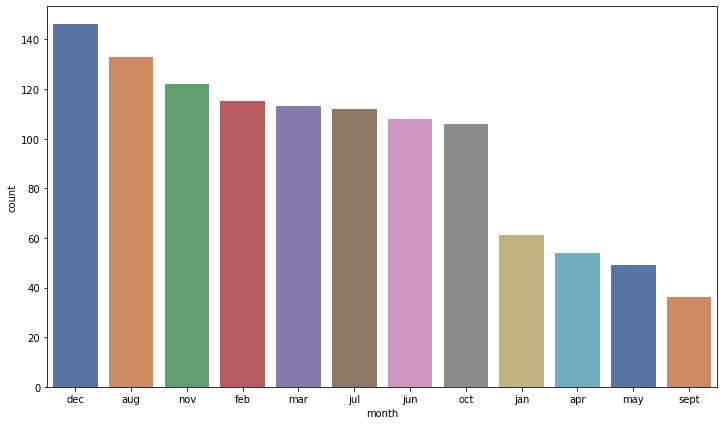

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(df['month'],palette = 'deep', order = df['month'].value_counts().index)
plt.show()

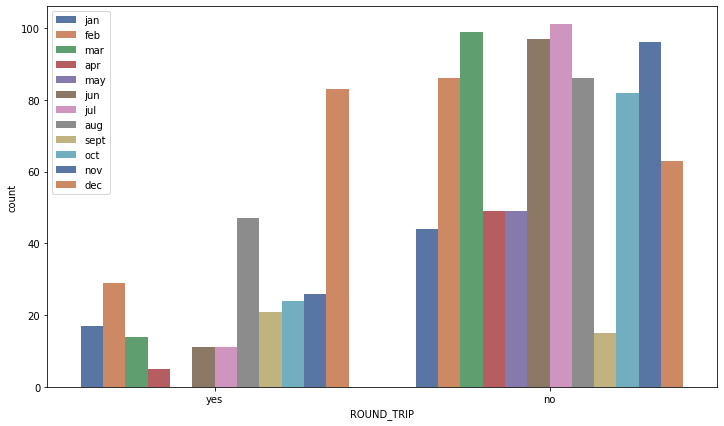

In [ ]:
plt.figure(figsize = (12,7))
sns.countplot(df['ROUND_TRIP'],hue= df['month'],palette = 'deep')
plt.legend()

<AxesSubplot:xlabel='minute', ylabel='MILES'>

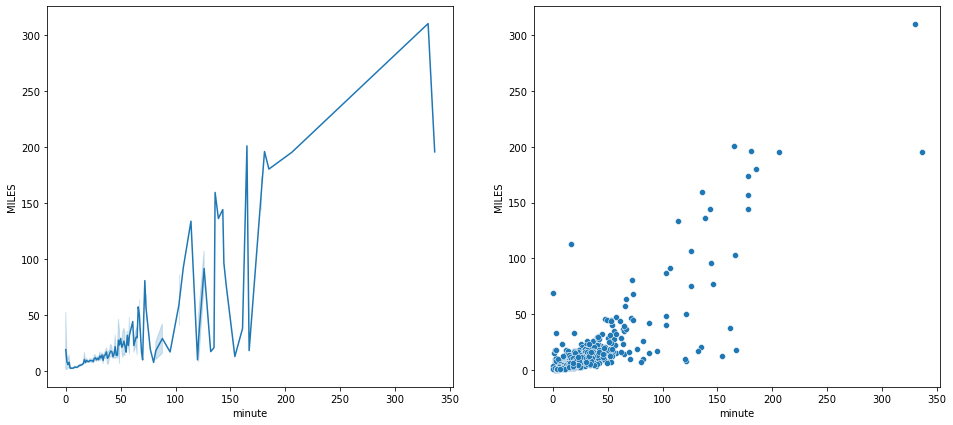

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df.minute,y= df.MILES)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df.minute,y=df.MILES)

*<h1 align="center">Distribution of cab rides based on category*

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

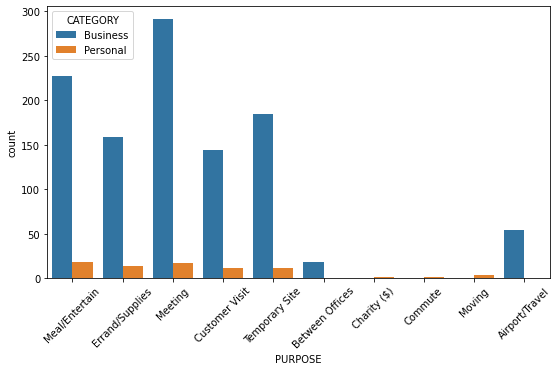

In [ ]:
plt.figure(figsize= (9,5))
sns.countplot(data = df,x = 'PURPOSE',hue = 'CATEGORY')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Westpark Place'),
  Text(10, 0, 'Apex'),
  Text(11, 0, 'Berkeley'),
  Text(12, 0, 'Midtown'),
  Text(13, 0, 'R?walpindi'),
  Text(14, 0, 'Kissimmee'),
  Text(15, 0, 'Kenner'),
  Text(16, 0, 'New Orleans'),
  Text(17, 0, 'Emeryville'),
  Text(18, 0, 'Downtown'),
  Text(19, 0, 'Colombo'),
  Text(20, 0, 'Orlando'),
  Text(21, 0, 'Banner Elk'),
  Text(22, 0, 'Edgehill Farms'),
  Text(23, 0, 'Central'),
  Text(24, 0, 'San Francisco')])

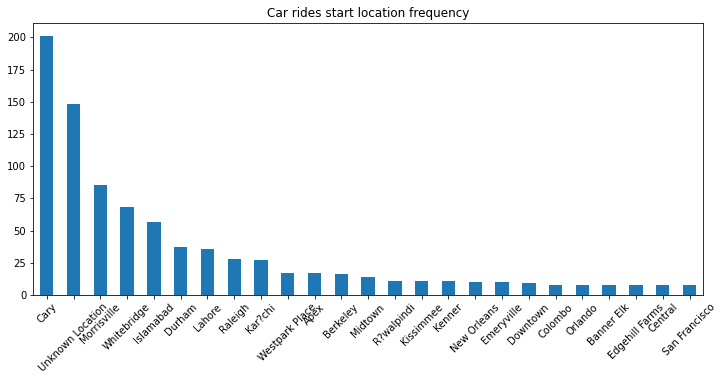

In [ ]:
# where do customers most frequently take cabs frequency of cab rides start points
plt.figure(figsize=(12,5))
pd.Series(df['START']).value_counts()[:25].plot(kind='bar')
plt.title('Car rides start location frequency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Lahore'),
  Text(6, 0, 'Durham'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Apex'),
  Text(10, 0, 'Berkeley'),
  Text(11, 0, 'Westpark Place'),
  Text(12, 0, 'R?walpindi'),
  Text(13, 0, 'Kissimmee'),
  Text(14, 0, 'Midtown'),
  Text(15, 0, 'Edgehill Farms'),
  Text(16, 0, 'Kenner'),
  Text(17, 0, 'New Orleans'),
  Text(18, 0, 'Emeryville'),
  Text(19, 0, 'Central'),
  Text(20, 0, 'San Francisco'),
  Text(21, 0, 'Banner Elk'),
  Text(22, 0, 'Colombo'),
  Text(23, 0, 'Oakland'),
  Text(24, 0, 'Orlando')])

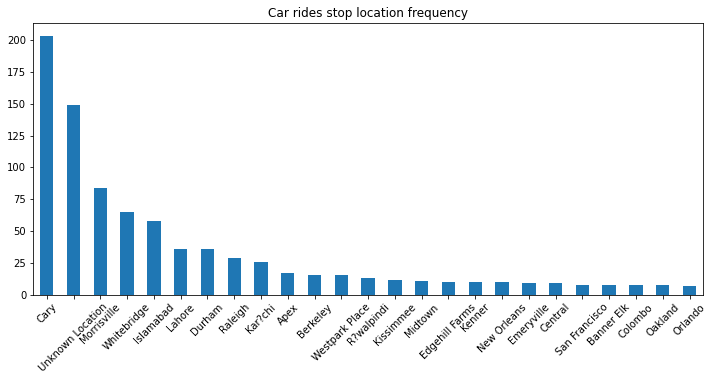

In [ ]:
# frequency of cab rides stop location
# where do customers most frequently take cabs frequency of cab rides start points
plt.figure(figsize=(12,5))
pd.Series(df['STOP']).value_counts()[:25].plot(kind='bar')
plt.title('Car rides stop location frequency')
plt.xticks(rotation=45)

# Conclusions